# Part 3: Supervised Model Training and Evaluation

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_rows', 10)
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
print("Vis setup Complete")
print("Setup complete")

Vis setup Complete
Setup complete


**Load cleansed dataset**

In [2]:
path = r"C:\Users\Matt-\Documents\aacmpsem2\DataMining\cw2\cwfinals\diab_cleansed.csv"

diab_cleansed = pd.read_csv(path)

diab = diab_cleansed

diab.shape

(75068, 60)

**Assign input variables (X)** 

In [3]:
# List of all columns minus diabetes_mellitus
diab_cols = ['age', 'height', 'weight', 'bmi', 'h1_temp_max', 'h1_temp_min', 'd1_albumin_max', 
             'd1_albumin_min', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_bun_max', 'd1_bun_min', 
             'd1_glucose_min', 'd1_hco3_max', 'd1_hco3_min', 'd1_platelets_max', 'd1_platelets_min', 
             'd1_potassium_max', 'd1_potassium_min', 'd1_sodium_max', 'd1_sodium_min', 'd1_wbc_max', 
             'd1_wbc_min', 'h1_glucose_max', 'h1_glucose_min', 'wbc_apache', 'd1_heartrate_max', 
             'heart_rate_apache', 'creatinine_apache', 'h1_spo2_max', 'map_apache', 'elective_surgery', 
             'gcs_eyes_apache', 'gcs_motor_apache', 'intubated_apache', 'ventilated_apache', 
             'aids', 'cirrhosis', 'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
             'solid_tumor_with_metastasis', 'icu_CCU-CTICU', 'icu_CSICU', 'icu_CTICU', 'icu_Cardiac ICU', 
             'icu_MICU', 'icu_Med-Surg ICU', 'icu_Neuro ICU', 'icu_SICU', 'gen_F', 'gen_M', 'eth_African American', 
             'eth_Asian', 'eth_Caucasian', 'eth_Hispanic', 'eth_Native American', 'eth_Other/Unknown']

X = diab[diab_cols]

# Check data frame has one less feature
X.shape

(75068, 59)

**Assign target variable (y)**

In [4]:
y = diab.diabetes_mellitus

y.head()

0    1
1    0
2    0
3    0
4    1
Name: diabetes_mellitus, dtype: int64

## Split dataset into train, validation and test sets

In [5]:
from sklearn.model_selection import train_test_split

# Divide dataset with stratification of target variable
# Test set will be 20% of the entire dataset

part1_X, test_X, part1_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
train_X, val_X, train_y, val_y = train_test_split(part1_X, part1_y, test_size=0.2, random_state=1, stratify=part1_y)

# Test to see data has been split as intended
print("Train data input (X):",train_X.shape)
print("Val data input (X):",val_X.shape)
print("Test data input (X):",test_X.shape)
print("Train data target (y):",train_y.value_counts())
print("Val data target (y):",val_y.value_counts())
print("Test data target (y):",test_y.value_counts())

Train data input (X): (48043, 59)
Val data input (X): (12011, 59)
Test data input (X): (15014, 59)
Train data target (y): 0    31749
1    16294
Name: diabetes_mellitus, dtype: int64
Val data target (y): 0    7938
1    4073
Name: diabetes_mellitus, dtype: int64
Test data target (y): 0    9922
1    5092
Name: diabetes_mellitus, dtype: int64


**Visualise target variable across three sets**

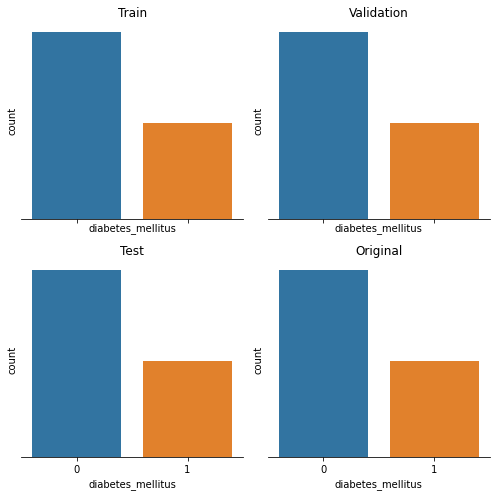

In [6]:
# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

#Train data
df=train_y.to_frame()
sns.countplot(x='diabetes_mellitus',data=df,ax=axes[0, 0]).set_title("Train")

#Validation data
df=val_y.to_frame()
sns.countplot(x='diabetes_mellitus',data=df,ax=axes[0, 1]).set_title("Validation")

#Test data
df=test_y.to_frame()
sns.countplot(x='diabetes_mellitus',data=df,ax=axes[1, 0]).set_title("Test")

#original data
sns.countplot(x='diabetes_mellitus',data=diab,ax=axes[1, 1]).set_title("Original")
plt.setp(axes, yticks=[])
plt.tight_layout()

## Feature selection on train set

### Feature ranking

In [7]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Select all features
selector = SelectKBest(score_func=mutual_info_classif, k='all')

# Pass input and target variables of train set 
Xfs = selector.fit_transform(train_X, train_y)

# Get column names 
names = train_X.columns.values[selector.get_support()]

# Det scores
scores = selector.scores_[selector.get_support()]

# Use zip to allocate column names to score 
names_scores = list(zip(names, scores))

# Create data frame for names and scores
ns_df = pd.DataFrame(data=names_scores, columns=['feat_names', 'mutual_info'])

# Sort in descending order
ns_ranked = ns_df.sort_values(['mutual_info', 'feat_names'], ascending = [False, True])

# View all features
pd.set_option('display.max_rows', None)

print(ns_ranked)
print('Length: ', len(ns_ranked))

                     feat_names  mutual_info
23               h1_glucose_max     0.036214
24               h1_glucose_min     0.031851
12               d1_glucose_min     0.029267
3                           bmi     0.021334
2                        weight     0.015656
10                   d1_bun_max     0.015267
28            creatinine_apache     0.013160
0                           age     0.012850
11                   d1_bun_min     0.011041
17             d1_potassium_max     0.009811
18             d1_potassium_min     0.005902
52                        gen_M     0.005636
33             gcs_motor_apache     0.005246
20                d1_sodium_min     0.005244
44                    icu_CSICU     0.004921
27            heart_rate_apache     0.004863
26             d1_heartrate_max     0.004587
16             d1_platelets_min     0.003631
50                     icu_SICU     0.003617
35            ventilated_apache     0.003550
55                eth_Caucasian     0.003435
49        

**Find lower half of ranked features**

In [8]:
bottom_ns_ranked = ns_ranked[30:]
print(bottom_ns_ranked)

             feat_names  mutual_info
47             icu_MICU     0.001846
32      gcs_eyes_apache     0.001536
5           h1_temp_min     0.001359
48     icu_Med-Surg ICU     0.001336
22           d1_wbc_min     0.001093
39    immunosuppression     0.000984
13          d1_hco3_max     0.000940
6        d1_albumin_max     0.000926
7        d1_albumin_min     0.000891
37            cirrhosis     0.000817
19        d1_sodium_max     0.000569
21           d1_wbc_max     0.000410
51                gen_F     0.000395
31     elective_surgery     0.000192
34     intubated_apache     0.000118
8      d1_bilirubin_max     0.000000
9      d1_bilirubin_min     0.000000
15     d1_platelets_max     0.000000
54            eth_Asian     0.000000
56         eth_Hispanic     0.000000
57  eth_Native American     0.000000
58    eth_Other/Unknown     0.000000
29          h1_spo2_max     0.000000
4           h1_temp_max     0.000000
1                height     0.000000
43        icu_CCU-CTICU     0.000000
4

**Drop lowest ranked features from train, validation and test sets**

In [9]:
# Create an empty array to which to append feature names
bottom_ranked_list = []

# Create for loop to iterate over data frame
for index, row in bottom_ns_ranked.iterrows():
    bottom_ranked_list.append(row['feat_names'])    
print(bottom_ranked_list, '\n')

# For testing - check shape before row omission
print('Train set shape before dropping: ', train_X.shape)
print('Validation set shape before dropping: ', val_X.shape)
print('Test set shape before dropping: ', test_X.shape)

# Drop features
train_X.drop(bottom_ranked_list, axis=1, inplace=True)
val_X.drop(bottom_ranked_list, axis=1, inplace=True)
test_X.drop(bottom_ranked_list, axis=1, inplace=True)

# For testing - check shape after row omission
print('Train set shape after dropping: ', train_X.shape)
print('Validation set shape after dropping: ', val_X.shape)
print('Test set shape after dropping: ', test_X.shape)

['icu_MICU', 'gcs_eyes_apache', 'h1_temp_min', 'icu_Med-Surg ICU', 'd1_wbc_min', 'immunosuppression', 'd1_hco3_max', 'd1_albumin_max', 'd1_albumin_min', 'cirrhosis', 'd1_sodium_max', 'd1_wbc_max', 'gen_F', 'elective_surgery', 'intubated_apache', 'd1_bilirubin_max', 'd1_bilirubin_min', 'd1_platelets_max', 'eth_Asian', 'eth_Hispanic', 'eth_Native American', 'eth_Other/Unknown', 'h1_spo2_max', 'h1_temp_max', 'height', 'icu_CCU-CTICU', 'icu_CTICU', 'leukemia', 'map_apache'] 

Train set shape before dropping:  (48043, 59)
Validation set shape before dropping:  (12011, 59)
Test set shape before dropping:  (15014, 59)
Train set shape after dropping:  (48043, 30)
Validation set shape after dropping:  (12011, 30)
Test set shape after dropping:  (15014, 30)


C:\Users\Matt-\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Correlation of features (Pearson)

In [10]:
# Assign columns a variable
corr_cols = train_X.columns

# Pass columns back through train_X index
corr = train_X[corr_cols].corr()
corr

,age,weight,bmi,d1_bun_max,d1_bun_min,d1_glucose_min,d1_hco3_min,d1_platelets_min,d1_potassium_max,d1_potassium_min,...,hepatic_failure,lymphoma,solid_tumor_with_metastasis,icu_CSICU,icu_Cardiac ICU,icu_Neuro ICU,icu_SICU,gen_M,eth_African American,eth_Caucasian
age,1.000000,-0.117666,-0.078853,0.235396,0.256867,0.059781,0.097580,-0.072788,0.062369,0.106501,...,-0.014095,0.024645,0.026471,0.039525,0.010429,-0.025909,-0.009881,-0.017330,-0.082064,0.093379
weight,-0.117666,1.000000,0.872370,0.041530,0.047191,0.121459,0.106315,-0.009842,0.090864,0.103796,...,0.000121,-0.007998,-0.035563,0.011211,-0.001481,-0.012738,0.002476,0.187578,0.039248,0.030562
bmi,-0.078853,0.872370,1.000000,0.038102,0.044410,0.119244,0.105806,0.024500,0.076277,0.088041,...,-0.006601,-0.008195,-0.040420,0.002674,-0.002762,-0.015622,-0.004515,-0.043587,0.035420,0.002380
d1_bun_max,0.235396,0.041530,0.038102,1.000000,0.972855,-0.009227,-0.182161,-0.097884,0.334244,0.251823,...,0.048595,0.007122,0.008633,-0.029997,0.022396,-0.072711,-0.021179,0.048695,0.021573,-0.013157
d1_bun_min,0.256867,0.047191,0.044410,0.972855,1.000000,0.010066,-0.130759,-0.088101,0.292356,0.285648,...,0.049088,0.007713,0.010933,-0.030244,0.022798,-0.068402,-0.022142,0.049893,0.019097,-0.009800
d1_glucose_min,0.059781,0.121459,0.119244,-0.009227,0.010066,1.000000,0.048815,0.066892,-0.008253,0.092558,...,-0.015183,-0.001306,0.013831,-0.021380,0.014383,0.024860,-0.005377,0.006114,-0.011425,0.012033
d1_hco3_min,0.097580,0.106315,0.105806,-0.182161,-0.130759,0.048815,1.000000,0.087538,-0.194765,0.026400,...,-0.038660,0.004182,-0.010180,-0.001967,0.017654,0.017544,-0.007274,0.020686,-0.023723,0.033649
d1_platelets_min,-0.072788,-0.009842,0.024500,-0.097884,-0.088101,0.066892,0.087538,1.000000,-0.068194,0.019255,...,-0.098116,-0.029748,-0.007717,-0.020675,0.010431,0.034860,-0.010944,-0.092885,0.024113,-0.012888
d1_potassium_max,0.062369,0.090864,0.076277,0.334244,0.292356,-0.008253,-0.194765,-0.068194,1.000000,0.661482,...,0.013670,0.002475,-0.004420,0.029472,-0.001782,-0.064067,0.015759,0.062641,0.007258,0.005741
d1_potassium_min,0.106501,0.103796,0.088041,0.251823,0.285648,0.092558,0.026400,0.019255,0.661482,1.000000,...,0.006520,0.005277,0.006733,0.003695,0.009882,-0.018891,0.001616,0.070553,-0.002549,0.012621


**Pearson correlation heatmap**

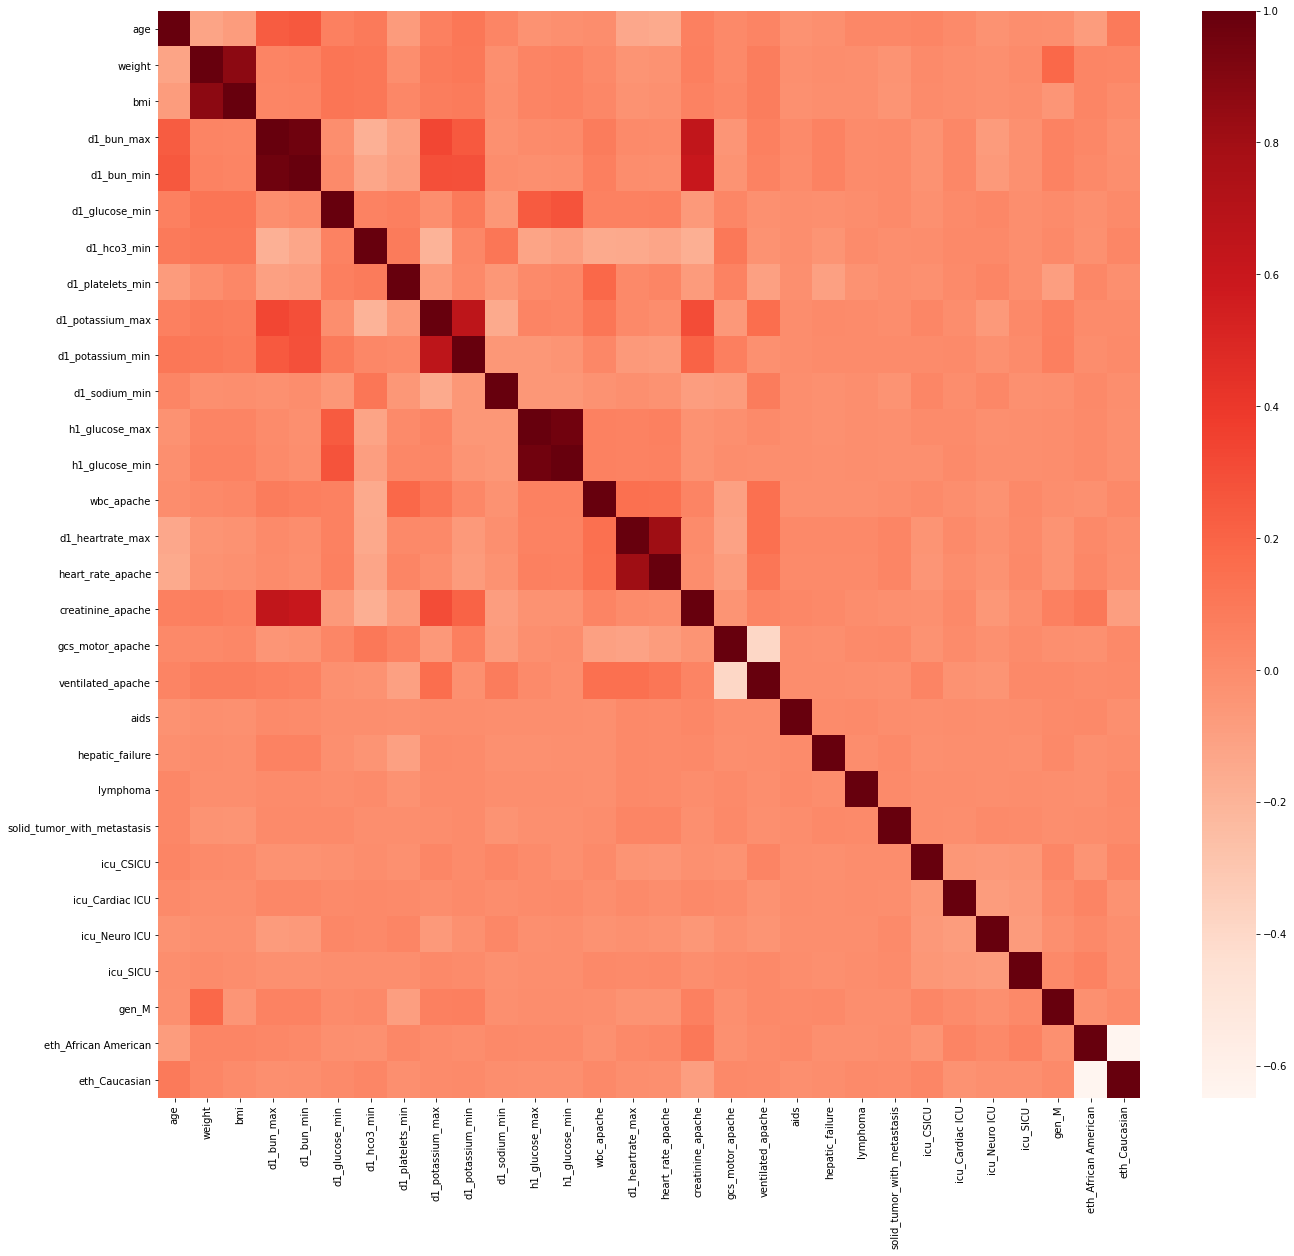

In [11]:
plt.figure(figsize=(22,20))
sns.heatmap(corr, annot=False, cmap=plt.cm.Reds)
plt.show()

**Find one feature of each pair of highly correlated features**

In [12]:
def correlation(data, threshold):
    col_corr = set() # Set data struct to hold names of correlated cols
    for i in range(len(corr.columns)):
        for j in range(i):
            if abs(corr.iloc[i, j]) > threshold:
                colname = corr.columns[i]
                col_corr.add(colname)
    return col_corr

**Pass through threshold and dataset**

In [13]:
corr_features = correlation(train_X, 0.7)

# View number of highly correlated features
len(set(corr_features))

4

**View features**

In [14]:
corr_features

{'bmi', 'd1_bun_min', 'h1_glucose_min', 'heart_rate_apache'}

**Drop highly correlated features from train, validation and test sets**

In [15]:
# For testing - check shape before row omission
print('Train set shape before dropping: ', train_X.shape)
print('Validation set shape before dropping: ', val_X.shape)
print('Test set shape before dropping: ', test_X.shape)

# Drop features
train_X.drop(corr_features, axis=1, inplace=True)
val_X.drop(corr_features, axis=1, inplace=True)
test_X.drop(corr_features, axis=1, inplace=True)

print("\n-----------------------------------------\n")

# For testing - check shape after row omission
print('Train set shape after dropping: ', train_X.shape)
print('Validation set shape after dropping: ', val_X.shape)
print('Test set shape after dropping: ', test_X.shape)

Train set shape before dropping:  (48043, 30)
Validation set shape before dropping:  (12011, 30)
Test set shape before dropping:  (15014, 30)

-----------------------------------------

Train set shape after dropping:  (48043, 26)
Validation set shape after dropping:  (12011, 26)
Test set shape after dropping:  (15014, 26)


C:\Users\Matt-\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


## Class imbalance (downsampling)

Downsampling creating entries artificially, potentially skewing how the dataset reflects real world data.

**Investigate current imbalance of target variable**

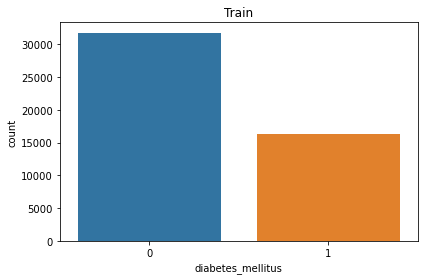

In [16]:
# Count plot visualisation
df=train_y.to_frame()
sns.countplot(x='diabetes_mellitus',data=df,).set_title("Train")
plt.setp(axes, yticks=[])
plt.tight_layout()

In [17]:
# Values of minority and majority classes
train_y.value_counts()

0    31749
1    16294
Name: diabetes_mellitus, dtype: int64

**Downsample majority class (without diabetes)**

In [18]:
from sklearn.utils import resample

# Concatenate training data back together
resampling = train_X.copy()
resampling['diabetes_mellitus'] = train_y.values

# Seperate and assign minority and majority classes
maj_class = resampling[resampling['diabetes_mellitus']==0]
min_class = resampling[resampling['diabetes_mellitus']==1]

# Upsample minority class
maj_downsampled = resample(maj_class,
                        replace=True,
                        n_samples=16294, # matches minority class
                        random_state=1) # 'reproducible results'.. but why?

# Combine majority class with upsampled min class
downsampled = pd.concat([min_class, maj_downsampled])

# Test data set
print(downsampled.describe())

# Display new class counts - are they the same for each class?
downsampled['diabetes_mellitus'].value_counts()

                age        weight    d1_bun_max  d1_glucose_min   d1_hco3_min  \
count  32588.000000  32588.000000  32588.000000    32588.000000  32588.000000   
mean      63.354548     85.843832     25.927977      117.013011     23.272462   
std       15.623353     24.929860     19.210857       39.749657      4.657895   
min        0.000000     38.600000      4.000000       33.000000      7.000000   
25%       55.000000     68.500000     14.000000       92.000000     21.000000   
50%       65.000000     81.600000     20.000000      109.000000     23.000000   
75%       75.000000     99.000000     31.000000      134.000000     26.000000   
max       89.000000    186.000000    126.000000      288.000000     39.000000   

       d1_platelets_min  d1_potassium_max  d1_potassium_min  d1_sodium_min  \
count      32588.000000      32588.000000      32588.000000   32588.000000   
mean         192.097605          4.267875          3.949313     137.681505   
std           77.461254          0.6

0    16294
1    16294
Name: diabetes_mellitus, dtype: int64

**Reassign downsampled dataset to train data**

In [19]:
# Remove target variable 
downsamp_cols = downsampled.columns[:-1]

# Input variables reassigned
train_X = downsampled[downsamp_cols]
print(train_X.shape)

# Target variable reasssigned
train_y = downsampled.diabetes_mellitus
print(train_y.shape)

(32588, 26)
(32588,)


**Visualise balanced classes**

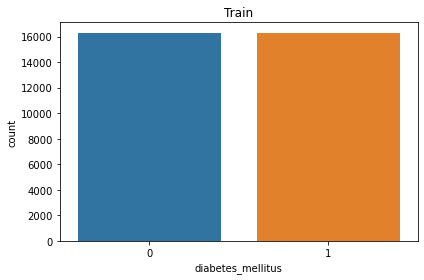

In [20]:
df=train_y.to_frame()
sns.countplot(x='diabetes_mellitus',data=df,).set_title("Train")
plt.setp(axes, yticks=[])
plt.tight_layout()

In [21]:
train_X.columns

Index(['age', 'weight', 'd1_bun_max', 'd1_glucose_min', 'd1_hco3_min',
       'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min',
       'd1_sodium_min', 'h1_glucose_max', 'wbc_apache', 'd1_heartrate_max',
       'creatinine_apache', 'gcs_motor_apache', 'ventilated_apache', 'aids',
       'hepatic_failure', 'lymphoma', 'solid_tumor_with_metastasis',
       'icu_CSICU', 'icu_Cardiac ICU', 'icu_Neuro ICU', 'icu_SICU', 'gen_M',
       'eth_African American', 'eth_Caucasian'],
      dtype='object')

## Model training and evaluation

**Relevant modules and libraries**

In [30]:
# Scalers and normalizers
from sklearn.preprocessing import StandardScaler

# Confusion matrix modules
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Accuracy score
from sklearn.metrics import accuracy_score

# GridSearch
from sklearn.model_selection import GridSearchCV

# Pipeline
from sklearn.pipeline import Pipeline

# Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score

### Multi layer perceptron (MLP) classifier

**Basic MLP classifier with minimal tuning**

In [22]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=1, max_iter=300)
mlp.fit(train_X, train_y)
mlp.predict_proba(val_X[:1])
pred_y = mlp.predict(val_X)
print(pred_y)
mlp.score(val_X, val_y)

[0 0 1 ... 1 0 0]


0.7156772958121722

**Confusion matrix of basic MLP**

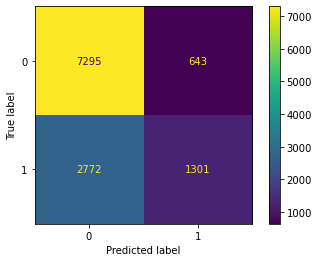

In [25]:
# Instantiate confusion matrix
cm = confusion_matrix(val_y, pred_y)

# Plot confusion matrix
plot_confusion_matrix(mlp, val_X, val_y)

**Ignore warning messages prior to cross validation**

In [33]:
import warnings
warnings.filterwarnings('ignore') 

**GridSearchCV to test hyperparameters of the MLP classifier - 30 mins to run**

In [28]:
mlp = MLPClassifier(random_state=1, max_iter=300)

# Set hidden layers sizes, activation function, solver, alpha and learning rate.
parameters = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
#the parameter n_jobs is to define how many CPU cores from your computer to use (-1 is for all the cores available).
#The cv is the number of splits for cross-validation.
clf = GridSearchCV(mlp, param_grid=parameters, n_jobs=-1, cv=3, scoring='accuracy')
clf.fit(train_X, train_y)

#here we can see the best parameter was for the MLP
print("Best parameters found:",clf.best_params_)

# In this instance I can also see the result of each cross validation by plotting the accuracy and standard deviation
# As well as the parameters tested in the run
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found: {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.670 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.678 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.677 (+/-0.003) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.678 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.671 (+/-0.011) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.679 (+/-0.008) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'a

**Classification report**

In [32]:
true_y, pred_y = val_y, clf.predict(val_X)

print('Classifaction report on validation set')
print(classification_report(true_y, pred_y))

Classifaction report on validation set
              precision    recall  f1-score   support

           0       0.82      0.68      0.74      7938
           1       0.53      0.70      0.60      4073

    accuracy                           0.69     12011
   macro avg       0.67      0.69      0.67     12011
weighted avg       0.72      0.69      0.70     12011



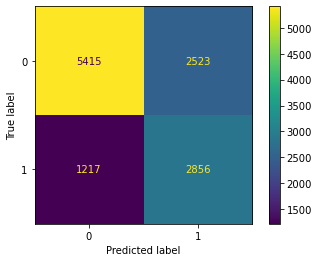

In [34]:
# Instantiate confusion matrix
cm = confusion_matrix(val_y, pred_y)

# Plot confusion matrix
plot_confusion_matrix(clf, val_X, val_y)

**Model accuracies for train and validation sets**

Train set

In [42]:
hat_y = clf.predict(train_X)

accuracy = accuracy_score(train_y, hat_y)
print('Best parameter accuracy: ', round(accuracy, 2))

Best parameter accuracy:  0.7


Validation set

In [43]:
hat_y = clf.predict(val_X)

accuracy = accuracy_score(val_y, hat_y)
print('Best parameter accuracy: ', round(accuracy, 2))

Best parameter accuracy:  0.69


### MLP model evaluation

In [45]:
process = [('transformer', StandardScaler()), ('clf', MLPClassifier(random_state=1, max_iter=300, activation='relu', alpha=0.05, hidden_layer_sizes = (50, 50, 50), learning_rate='adaptive', solver='sgd'))]

pipe = Pipeline(process)

pipe.fit(train_X, train_y)

C:\Users\Matt-\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('transformer', StandardScaler()),
                ('clf',
                 MLPClassifier(alpha=0.05, hidden_layer_sizes=(50, 50, 50),
                               learning_rate='adaptive', max_iter=300,
                               random_state=1, solver='sgd'))])

**Plot precision and recall**

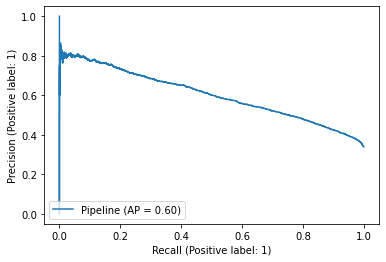

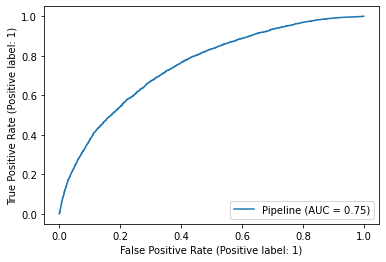

In [46]:
plot_precision_recall_curve(pipe, test_X, test_y)

plot_roc_curve(pipe, test_X, test_y)

**Accuracy, balanced accuracy and f1 scores**

In [49]:
pred_y = pipe.predict(test_X)

acc = accuracy_score(test_y, pred_y)
print(acc)

bacc = balanced_accuracy_score(test_y, pred_y)
print(bacc)

f1 = f1_score(test_y, pred_y)
print(f1)

0.6858265618755828
0.6855288215876452
0.5964582085721618


### Naive bayes classifier

**Basic NB classifier with minimal tuning**

In [26]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(train_X, train_y)
nb.predict_proba(val_X[:1])
pred_y = nb.predict(val_X)
print(pred_y)
nb.score(val_X, val_y)

[0 0 1 ... 1 0 0]


0.6911997335775539

**Confusion matrix of basic NB classifier**

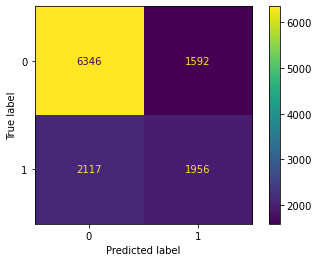

In [25]:
# Instantiate confusion matrix
cm = confusion_matrix(val_y, pred_y)

# Plot confusion matrix
plot_confusion_matrix(nb, val_X, val_y)

**GridSearchCV to tune hyperparameters of the NB classifier**

In [27]:
# Create parameter grid
parameters = {'var_smoothing': np.logspace(0,-9, num=100)}

clf = GridSearchCV(nb, param_grid=parameters, n_jobs=-1, cv=3, scoring='accuracy')
clf.fit(train_X, train_y)

# List of best parameters for GaussianNB
print("Best parameters found:",clf.best_params_)

# In this instance I can also see the result of each cross validation by plotting the accuracy and standard deviation
# As well as the parameters tested in the run
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found: {'var_smoothing': 8.111308307896872e-05}
0.591 (+/-0.005) for {'var_smoothing': 1.0}
0.595 (+/-0.005) for {'var_smoothing': 0.8111308307896871}
0.598 (+/-0.006) for {'var_smoothing': 0.657933224657568}
0.602 (+/-0.005) for {'var_smoothing': 0.533669923120631}
0.607 (+/-0.005) for {'var_smoothing': 0.43287612810830584}
0.610 (+/-0.005) for {'var_smoothing': 0.3511191734215131}
0.613 (+/-0.003) for {'var_smoothing': 0.2848035868435802}
0.616 (+/-0.005) for {'var_smoothing': 0.23101297000831597}
0.619 (+/-0.008) for {'var_smoothing': 0.1873817422860384}
0.622 (+/-0.008) for {'var_smoothing': 0.15199110829529336}
0.624 (+/-0.007) for {'var_smoothing': 0.12328467394420659}
0.627 (+/-0.005) for {'var_smoothing': 0.1}
0.629 (+/-0.006) for {'var_smoothing': 0.08111308307896872}
0.631 (+/-0.006) for {'var_smoothing': 0.0657933224657568}
0.632 (+/-0.006) for {'var_smoothing': 0.0533669923120631}
0.634 (+/-0.006) for {'var_smoothing': 0.04328761281083057}
0.636 (+/-0.006) f

**Classification report**

In [28]:
from sklearn.metrics import classification_report

true_y, pred_y = val_y, clf.predict(val_X)

print('Classifaction report on validation set')
print(classification_report(true_y, pred_y))

Classifaction report on validation set
              precision    recall  f1-score   support

           0       0.76      0.81      0.78      7938
           1       0.57      0.51      0.54      4073

    accuracy                           0.71     12011
   macro avg       0.67      0.66      0.66     12011
weighted avg       0.70      0.71      0.70     12011



**Confusion matrix**

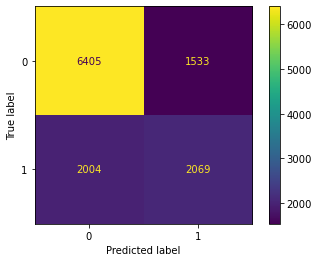

In [29]:
# Instantiate confusion matrix
cm = confusion_matrix(val_y, pred_y)

# Plot confusion matrix
plot_confusion_matrix(clf, val_X, val_y)

**Model accuracies for train and validation sets**

Train set

In [31]:
hat_y = clf.predict(train_X)

accuracy = accuracy_score(train_y, hat_y)
print('Best parameter accuracy: ', round(accuracy, 2))

Best parameter accuracy:  0.65


Validation set

In [32]:
hat_y = clf.predict(val_X)

accuracy = accuracy_score(val_y, hat_y)
print('Best parameter accuracy: ', round(accuracy, 2))

Best parameter accuracy:  0.71


### GaussianNB model evaluation

In [33]:
process = [('transformer', StandardScaler()), ('clf', GaussianNB(var_smoothing=0.0001))]

pipe = Pipeline(process)

pipe.fit(train_X, train_y)

Pipeline(steps=[('transformer', StandardScaler()),
                ('clf', GaussianNB(var_smoothing=0.0001))])

**Plot precision and recall**

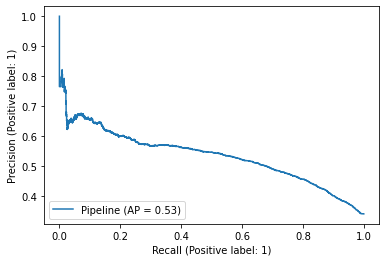

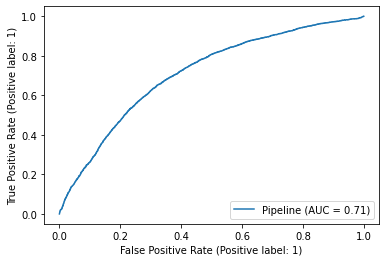

In [34]:
plot_precision_recall_curve(pipe, test_X, test_y)

plot_roc_curve(pipe, test_X, test_y)

**Accuracy, balanced accuracy and f1 scores**

In [36]:
pred_y = pipe.predict(test_X)

acc = accuracy_score(test_y, pred_y)
print(acc)

bacc = balanced_accuracy_score(test_y, pred_y)
print(bacc)

f1 = f1_score(test_y, pred_y)
print(f1)

0.6886239509790862
0.6396061510734238
0.5148905260973332


### Decision tree classifier

**Decision tree accuracy score with no tuning**

In [23]:
from sklearn.tree import DecisionTreeClassifier
from itertools import permutations, combinations

tree = DecisionTreeClassifier()
tree.fit(train_X, train_y)
pred_y = tree.predict(val_X)
print(pred_y)
tree.score(val_X, val_y)

[1 0 0 ... 1 1 0]


0.5922071434518358

**Confusion matrix of basic decision tree classifier**

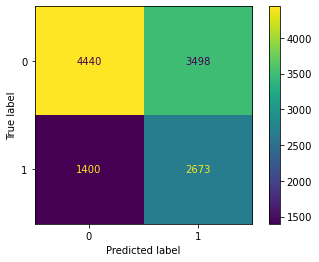

In [24]:
plot_confusion_matrix(tree, val_X, val_y)

In [25]:
train_X.columns

Index(['age', 'weight', 'd1_bun_max', 'd1_glucose_min', 'd1_hco3_min',
       'd1_platelets_min', 'd1_potassium_max', 'd1_potassium_min',
       'd1_sodium_min', 'h1_glucose_max', 'wbc_apache', 'd1_heartrate_max',
       'creatinine_apache', 'gcs_motor_apache', 'ventilated_apache', 'aids',
       'hepatic_failure', 'lymphoma', 'solid_tumor_with_metastasis',
       'icu_CSICU', 'icu_Cardiac ICU', 'icu_Neuro ICU', 'icu_SICU', 'gen_M',
       'eth_African American', 'eth_Caucasian'],
      dtype='object')

**Cross validation to explore best features to use**

In [37]:
features_to_use = ['h1_glucose_max', 'd1_bun_max', 'age', 'weight', 'd1_glucose_min', 'd1_bun_max']

criterion_parameter = list(combinations(features_to_use, 3))
print(criterion_parameter)

accuracies = []
for feature_set in criterion_parameter:
    # get the position of the indexes to the features
    index_map = [features_to_use.index(feature) for feature in feature_set]
    
    print(index_map)

    #pass in a smaller set of the whole train to limit params, by selecting the appropriate columns.
    train_X_cv, val_X_cv, train_y_cv, val_y_cv = train_test_split(train_X.iloc[:, index_map], train_y)

    #build classifier with our current parameter.
    clf_tree_cv = DecisionTreeClassifier()
    
    #fit our parameterised model to the cross-validated data.
    clf_tree_cv.fit(train_X_cv, train_y_cv)

    #obtain predictions on the cv test set.
    hat_y_cv = clf_tree_cv.predict(val_X_cv)

    #append the accuracies to the list of all of them.
    accuracies.append(accuracy_score(val_y_cv, hat_y_cv))
    
    print(accuracies)

[('h1_glucose_max', 'd1_bun_max', 'age'), ('h1_glucose_max', 'd1_bun_max', 'weight'), ('h1_glucose_max', 'd1_bun_max', 'd1_glucose_min'), ('h1_glucose_max', 'd1_bun_max', 'd1_bun_max'), ('h1_glucose_max', 'age', 'weight'), ('h1_glucose_max', 'age', 'd1_glucose_min'), ('h1_glucose_max', 'age', 'd1_bun_max'), ('h1_glucose_max', 'weight', 'd1_glucose_min'), ('h1_glucose_max', 'weight', 'd1_bun_max'), ('h1_glucose_max', 'd1_glucose_min', 'd1_bun_max'), ('d1_bun_max', 'age', 'weight'), ('d1_bun_max', 'age', 'd1_glucose_min'), ('d1_bun_max', 'age', 'd1_bun_max'), ('d1_bun_max', 'weight', 'd1_glucose_min'), ('d1_bun_max', 'weight', 'd1_bun_max'), ('d1_bun_max', 'd1_glucose_min', 'd1_bun_max'), ('age', 'weight', 'd1_glucose_min'), ('age', 'weight', 'd1_bun_max'), ('age', 'd1_glucose_min', 'd1_bun_max'), ('weight', 'd1_glucose_min', 'd1_bun_max')]
[0, 1, 2]
[0.6170369461151344]
[0, 1, 3]
[0.6170369461151344, 0.6447772186080766]
[0, 1, 4]
[0.6170369461151344, 0.6447772186080766, 0.62685651159936

**Best accuracy score feature combination**

In [28]:
best_features = criterion_parameter[np.argmax(accuracies)]
print(best_features)

index_map = [features_to_use.index(feature) for feature in best_features]

print(index_map)

# train the classifier using the best feature set.
clf = DecisionTreeClassifier()
clf.fit(train_X.iloc[:, index_map], train_y)

# evaluate the accuracy using the unseen test data.
score = accuracy_score(val_y, clf.predict(val_X.iloc[:, index_map]))
print(score)

('d1_bun_max', 'age', 'weight')
[1, 2, 3]
0.5500790941636833


**Classification report**

In [31]:
true_y, pred_y = val_y, clf.predict(val_X.iloc[:, index_map])

print('Classification report on validation set')
print(classification_report(true_y, pred_y))

Classification report on validation set
              precision    recall  f1-score   support

           0       0.72      0.52      0.61      7938
           1       0.39      0.61      0.48      4073

    accuracy                           0.55     12011
   macro avg       0.56      0.56      0.54     12011
weighted avg       0.61      0.55      0.56     12011



**Confusion matrix**

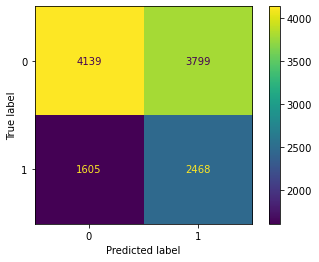

In [33]:
plot_confusion_matrix(clf, val_X.iloc[:, index_map], val_y)

### Decision tree model evalutation

In [34]:
process = [('transformer', StandardScaler()), ('clf', DecisionTreeClassifier())]

pipe = Pipeline(process)

pipe.fit(train_X.iloc[:, index_map], train_y)

Pipeline(steps=[('transformer', StandardScaler()),
                ('clf', DecisionTreeClassifier())])

**Plot precision and recall**

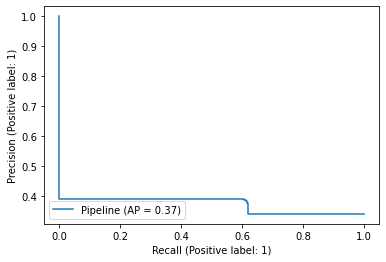

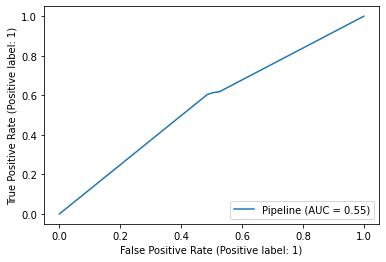

In [35]:
plot_precision_recall_curve(pipe, test_X.iloc[:, index_map], test_y)

plot_roc_curve(pipe, test_X.iloc[:, index_map], test_y)

**Accuracy, balanced accuracy and f1 scores**

In [36]:
pred_y = pipe.predict(test_X.iloc[:, index_map])

acc = accuracy_score(test_y, pred_y)
print(acc)

bacc = balanced_accuracy_score(test_y, pred_y)
print(bacc)

f1 = f1_score(test_y, pred_y)
print(f1)

0.5428932995870521
0.5583130309580477
0.47357520902048017
